<a href="https://colab.research.google.com/github/atharvmendhe18/projects/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
import tensorflow as tf
import matplotlib.pyplot as plt

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)
x_train = x_train.reshape(
    x_train.shape[0], x_train.shape[1], x_train.shape[2], 1
)
x_test = x_test.reshape(
    x_test.shape[0], x_test.shape[1], x_test.shape[2], 1
)

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
from keras.api._v2.keras.layers import Dropout
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (28,28,1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)
history = model.fit(x_train, y_train, epochs=6, validation_data = (x_test,y_test))

Epoch 1/6
1875/1875 [==============================] - 64s 33ms/step - loss: 0.2555 - accuracy: 0.9233 - val_loss: 0.0553 - val_accuracy: 0.9837
Epoch 2/6
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0996 - accuracy: 0.9710 - val_loss: 0.0429 - val_accuracy: 0.9851
Epoch 3/6
1875/1875 [==============================] - 63s 33ms/step - loss: 0.0768 - accuracy: 0.9776 - val_loss: 0.0329 - val_accuracy: 0.9889
Epoch 4/6
1875/1875 [==============================] - 73s 39ms/step - loss: 0.0639 - accuracy: 0.9810 - val_loss: 0.0298 - val_accuracy: 0.9902
Epoch 5/6
1875/1875 [==============================] - 72s 38ms/step - loss: 0.0547 - accuracy: 0.9838 - val_loss: 0.0318 - val_accuracy: 0.9904
Epoch 6/6
1875/1875 [==============================] - 75s 40ms/step - loss: 0.0483 - accuracy: 0.9855 - val_loss: 0.0327 - val_accuracy: 0.9893


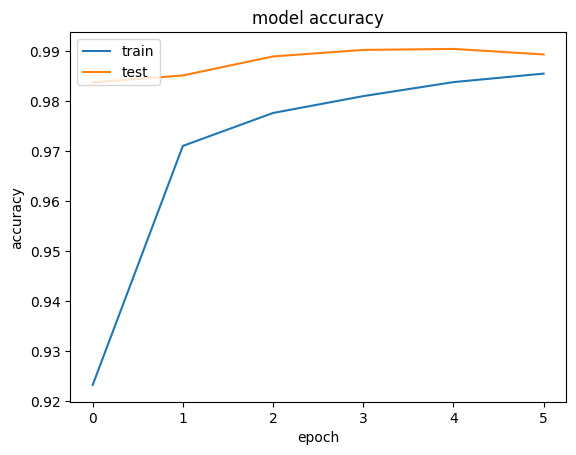

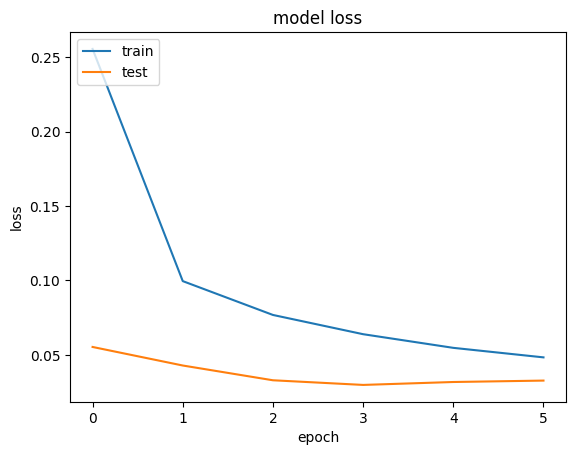

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()


In [ ]:
!wget https://thumb.ac-illust.com/d5/d54404572b4528dfc071e79b57413724_t.jpeg

--2023-08-08 06:41:41--  https://thumb.ac-illust.com/d5/d54404572b4528dfc071e79b57413724_t.jpeg
Resolving thumb.ac-illust.com (thumb.ac-illust.com)... 65.8.49.23, 65.8.49.32, 65.8.49.109, ...
Connecting to thumb.ac-illust.com (thumb.ac-illust.com)|65.8.49.23|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24725 (24K) [image/jpeg]
Saving to: ‘d54404572b4528dfc071e79b57413724_t.jpeg’

d54404572b4528dfc07 100%[===================>]  24.15K  --.-KB/s    in 0.1s    

2023-08-08 06:41:42 (185 KB/s) - ‘d54404572b4528dfc071e79b57413724_t.jpeg’ saved [24725/24725]



1/1 [==============================] - 0s 29ms/step
[[1.4495900e-07 1.0935946e-05 1.0718333e-02 9.8605132e-01 1.3619555e-06
  3.4285971e-04 7.3723498e-08 1.5798914e-04 8.6029191e-05 2.6309020e-03]]
3


Exception ignored in: <function _xla_gc_callback at 0x7ea4da9236d0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 103, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


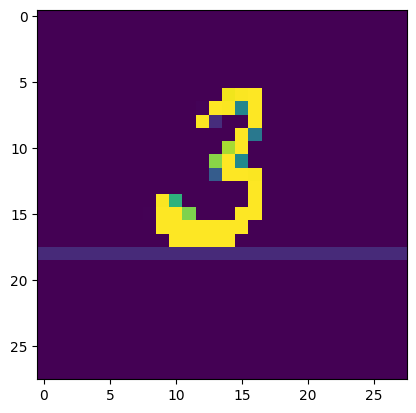

In [ ]:
import cv2
import numpy as np

image_path = '/content/IMG_B21B522D847C-1.jpeg'

image = cv2.imread(image_path)
image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
image = cv2.resize(image, dsize=(28,28))
image = image.astype(np.float32) / 255.0

predicted_classs = model.predict(np.expand_dims(image, axis=0))


print(predicted_classs)
print(np.argmax(predicted_classs))

plt.imshow(image)

plt.show()

1/1 [==============================] - 0s 21ms/step
Predicted: class=2


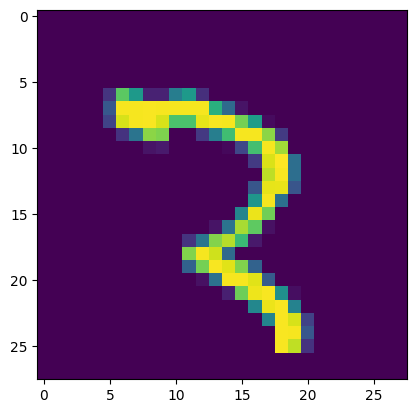

In [ ]:
image = x_train[500]
yhat = model.predict(np.asarray([image]))
print('Predicted: class=%d' % np.argmax(yhat))

plt.imshow(image)

plt.show()